In [79]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [80]:

# Load the MNIST dataset.
fashion_mnist = tf.keras.datasets.fashion_mnist
train_data, test_data = fashion_mnist.load_data()

In [81]:
# Divide the data into features and labels.
train_images, y_train = train_data
test_images, y_test = test_data

In [82]:
# Reshape and normalize the images.
X_train = train_images.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255
X_test = test_images.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

In [83]:
# Show the shapes of the data.
print("Training Images:", X_train.shape)
print("Testing Images:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Test Labels:", y_test.shape)

Training Images: (60000, 28, 28, 1)
Testing Images: (10000, 28, 28, 1)
Training Labels: (60000,)
Test Labels: (10000,)


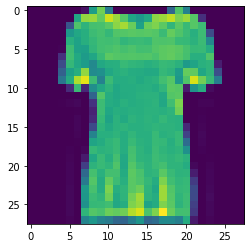

In [84]:
# Show a sample MNIST fashion item.
plt.imshow(train_images[10])
plt.show()

In [85]:
# Define the class names.
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [86]:

# Define the sequential model.
model = tf.keras.models.Sequential()

In [87]:

# Define the network's layes.
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [88]:
# Show the model.
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [89]:
# Compile the model.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [90]:
from PIL import Image as im
# Define the parameters.
num_epochs = 10
batch_size = 256

# Train the model.
history = model.fit(X_train, 
                      y_train, 
                      epochs=num_epochs, 
                      batch_size=batch_size, 
                      validation_data=(X_test,y_test))

Epoch 1/10
235/235 [==============================] - 42s 175ms/step - loss: 1.0671 - accuracy: 0.6043 - val_loss: 0.4976 - val_accuracy: 0.8089
Epoch 2/10
235/235 [==============================] - 41s 175ms/step - loss: 0.4333 - accuracy: 0.8425 - val_loss: 0.4034 - val_accuracy: 0.8555
Epoch 3/10
235/235 [==============================] - 41s 176ms/step - loss: 0.3644 - accuracy: 0.8707 - val_loss: 0.3606 - val_accuracy: 0.8705
Epoch 4/10
235/235 [==============================] - 41s 175ms/step - loss: 0.3324 - accuracy: 0.8797 - val_loss: 0.3392 - val_accuracy: 0.8752
Epoch 5/10
235/235 [==============================] - 41s 175ms/step - loss: 0.2984 - accuracy: 0.8918 - val_loss: 0.3147 - val_accuracy: 0.8847
Epoch 6/10
235/235 [==============================] - 41s 174ms/step - loss: 0.2828 - accuracy: 0.8984 - val_loss: 0.3016 - val_accuracy: 0.8937
Epoch 7/10
235/235 [==============================] - 41s 175ms/step - loss: 0.2628 - accuracy: 0.9046 - val_loss: 0.2831 - val_ac

In [91]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_accuracy)
print('Test Loss:', test_loss)

313/313 [==============================] - 3s 9ms/step - loss: 0.2835 - accuracy: 0.8994
Test Accuracy: 0.899399995803833
Test Loss: 0.2834913432598114


In [92]:
# Save the metrics.
metrics = history.history

In [93]:
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']

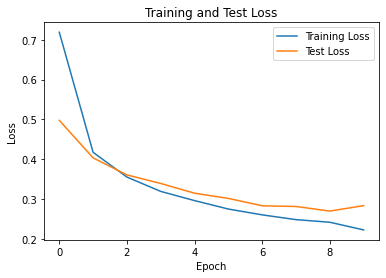

In [94]:
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Test Loss')
plt.legend()
plt.show()

In [95]:

train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']

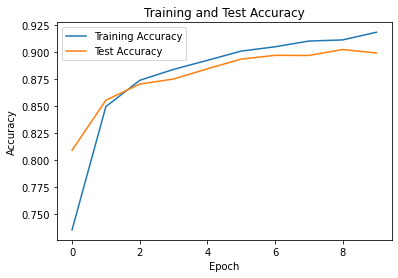

In [96]:

plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Test Accuracy')
plt.legend()
plt.show()

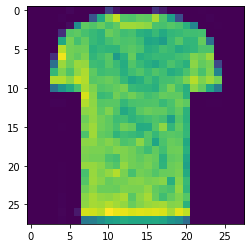

Prediction: T-Shirt/Top


In [97]:
# Make predictions with the trained model.
predictions = model.predict(X_test)

# Choose an index.
index = 125

# Show an image from the test set.
plt.imshow(test_images[index])
plt.show()

print("Prediction:", class_names[np.argmax(predictions[index])])